<a href="https://colab.research.google.com/github/chanu0073/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import yfinance as yf

In [3]:
start = '2014-01-01'
end = '2025-03-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.shape

(2827, 5)

In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392101,27.687837,27.390366,27.639994,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2025-03-24,169.929993,170.500000,167.440002,169.264999,18742800
2025-03-25,172.789993,172.910004,170.550003,171.179993,13841600


In [6]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
1,2014-01-03,27.392101,27.687837,27.390366,27.639994,66917888
2,2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
3,2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
4,2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...,...
2822,2025-03-24,169.929993,170.500000,167.440002,169.264999,18742800
2823,2025-03-25,172.789993,172.910004,170.550003,171.179993,13841600
2824,2025-03-26,167.139999,171.940002,166.860992,171.300003,22498000


In [8]:
data.shape

(2827, 6)

In [9]:
data.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


Moving Avg for 100 days

In [10]:
ma_100_days = data.Close.rolling(100).mean()

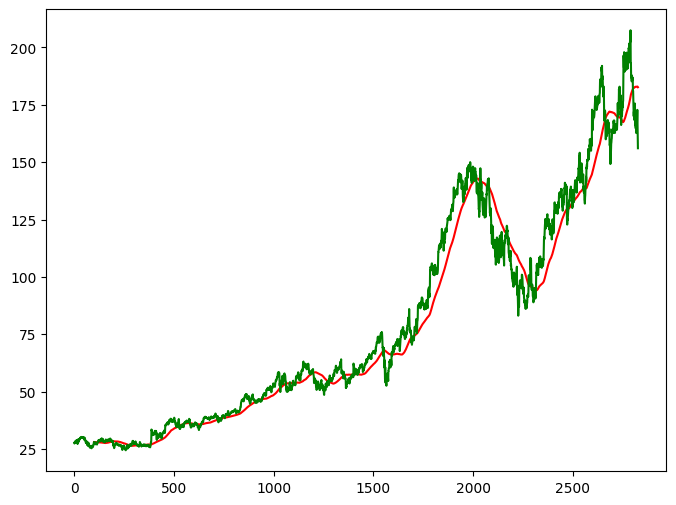

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

Moving Avg for 200 days

In [12]:
ma_200_days = data.Close.rolling(200).mean()

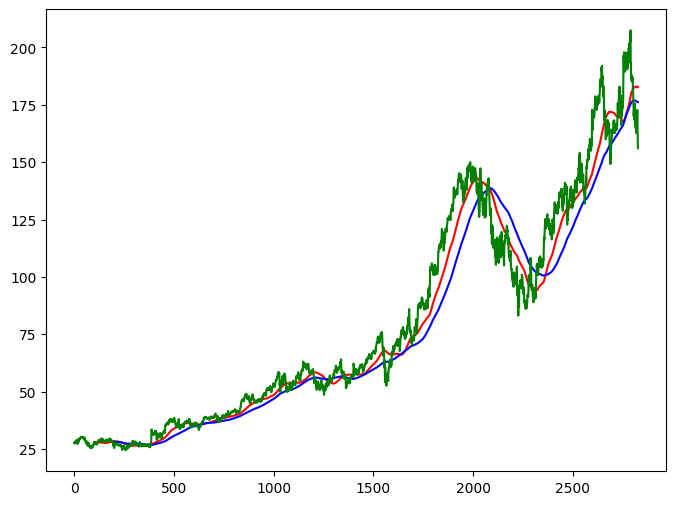

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
train_data = data.Close[0: int(len(data)*0.8)]
test_data = data.Close[int(len(data)*0.8): len(data)]

In [16]:
train_data.shape

(2261, 1)

In [17]:
test_data.shape

(566, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

**MinMaxScaler**


---


X' = (X - Xmin)/(Xmax - Xmin)  

In [19]:
train_data_scaled = scaler.fit_transform(train_data)

In [20]:
x = []
y = []

for i in range(100, train_data_scaled.shape[0]):
  x.append(train_data_scaled[i-100:i])
  y.append(train_data_scaled[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
print(x)

[[[0.02508157]
  [0.02347839]
  [0.02591082]
  ...
  [0.02075573]
  [0.02377559]
  [0.02901296]]

 [[0.02347839]
  [0.02591082]
  [0.03016363]
  ...
  [0.02377559]
  [0.02901296]
  [0.02732515]]

 [[0.02591082]
  [0.03016363]
  [0.03063158]
  ...
  [0.02901296]
  [0.02732515]
  [0.02669273]]

 ...

 [[0.72993033]
  [0.72073483]
  [0.72406431]
  ...
  [0.52826396]
  [0.5255687 ]
  [0.51201326]]

 [[0.72073483]
  [0.72406431]
  [0.74689448]
  ...
  [0.5255687 ]
  [0.51201326]
  [0.51581835]]

 [[0.72406431]
  [0.74689448]
  [0.74760787]
  ...
  [0.51201326]
  [0.51581835]
  [0.52073314]]]


In [23]:
print(y)

[0.02732515 0.02669273 0.0266176  ... 0.51581835 0.52073314 0.50495824]


In [24]:
len(x[0])

100

In [25]:
len(y)

2161

In [26]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 112ms/step - loss: 0.0808
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0073
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0069
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0049
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0061
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0050
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0041
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0051
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0044
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0038
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0037
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0041
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0042
Ep

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [31]:
past_100_days = train_data.tail(100)
test_data = pd.concat([past_100_days, test_data], ignore_index=True)

In [32]:
test_data

Ticker,GOOG
0,118.220062
1,118.309631
2,117.662697
3,117.583069
4,116.946083
...,...
661,169.929993
662,172.789993
663,167.139999
664,164.080002


In [33]:
test_data_scaled = scaler.fit_transform(test_data)

In [34]:
a = []
b = []

for i in range(100, test_data_scaled.shape[0]):
  a.append(test_data_scaled[i-100:i])
  b.append(test_data_scaled[i,0])

In [35]:
a, b = np.array(a), np.array(b)

In [36]:
y_predict = model.predict(x)

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [37]:
y_predict

array([[0.05724427],
       [0.05752872],
       [0.05790636],
       ...,
       [0.5496068 ],
       [0.5449405 ],
       [0.54015636]], dtype=float32)

In [38]:
scaler.scale_

array([0.00804006])

In [39]:
scale = 1/scaler.scale_

In [40]:
y_predict = y_predict * scale

In [41]:
y = y*scale

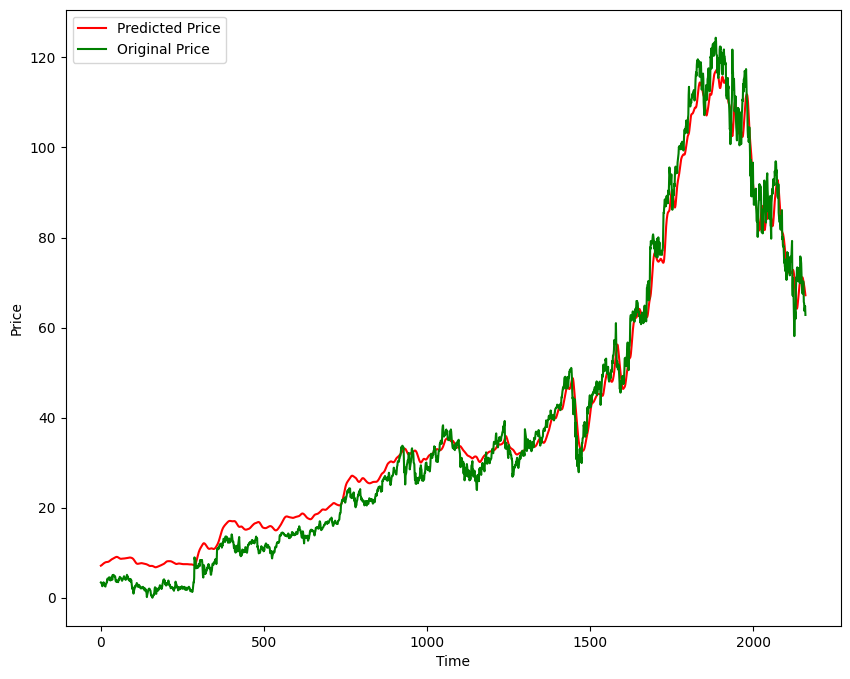

In [42]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
model.save('Stock Price Prediction Model.keras')